In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from trading_bot.data_collector import get_stock_data
from trading_bot.data_processor import (
    load_data,
    add_technical_indicators,
    clean_data,
    normalize_data,
    save_processed_data,
)

In [2]:
get_stock_data("MSFT", "1y", save_to_csv=True)

Data saved to data/raw/MSFT_1y.csv


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-09 00:00:00-04:00,322.330588,327.839228,320.772277,327.362823,19891200,0.0,0.0
2023-10-10 00:00:00-04:00,328.494312,328.633283,325.228844,325.943481,20557100,0.0,0.0
2023-10-11 00:00:00-04:00,328.742444,330.340465,326.687888,329.943451,20063200,0.0,0.0
2023-10-12 00:00:00-04:00,328.107209,331.144409,326.270986,328.692810,19313100,0.0,0.0
2023-10-13 00:00:00-04:00,329.903711,331.342890,323.928542,325.288361,21072400,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-02 00:00:00-04:00,422.579987,422.820007,416.709991,417.130005,16582300,0.0,0.0
2024-10-03 00:00:00-04:00,417.630005,419.549988,414.290009,416.540009,13686400,0.0,0.0
2024-10-04 00:00:00-04:00,418.239990,419.750000,414.970001,416.059998,19169700,0.0,0.0


In [3]:
ticker = "MSFT"
period = "1y"
data = load_data(ticker, period)
data = add_technical_indicators(data)
data = clean_data(data)
data = normalize_data(data)
save_processed_data(data, ticker, period)

In [4]:
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
data = pd.read_csv(
    "data/processed/MSFT_1y_processed.csv", parse_dates=["Date"], index_col="Date"
)
data.head()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 2023-11-24 00:00:00-05:00 to 2024-10-08 00:00:00-04:00
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               219 non-null    float64
 1   High               219 non-null    float64
 2   Low                219 non-null    float64
 3   Close              219 non-null    float64
 4   Volume             219 non-null    int64  
 5   Dividends          219 non-null    float64
 6   Stock Splits       219 non-null    float64
 7   SMA_5              219 non-null    float64
 8   RSI                219 non-null    float64
 9   MACD               219 non-null    float64
 10  MACD_Signal        219 non-null    float64
 11  MACD_Histogram     219 non-null    float64
 12  BollingerB_Lower   219 non-null    float64
 13  BollingerB_Middle  219 non-null    float64
 14  BollingerB_Upper   219 non-null    float64
 15  EMA                219 non-null  

Open                 0
High                 0
Low                  0
Close                0
Volume               0
Dividends            0
Stock Splits         0
SMA_5                0
RSI                  0
MACD                 0
MACD_Signal          0
MACD_Histogram       0
BollingerB_Lower     0
BollingerB_Middle    0
BollingerB_Upper     0
EMA                  0
dtype: int64

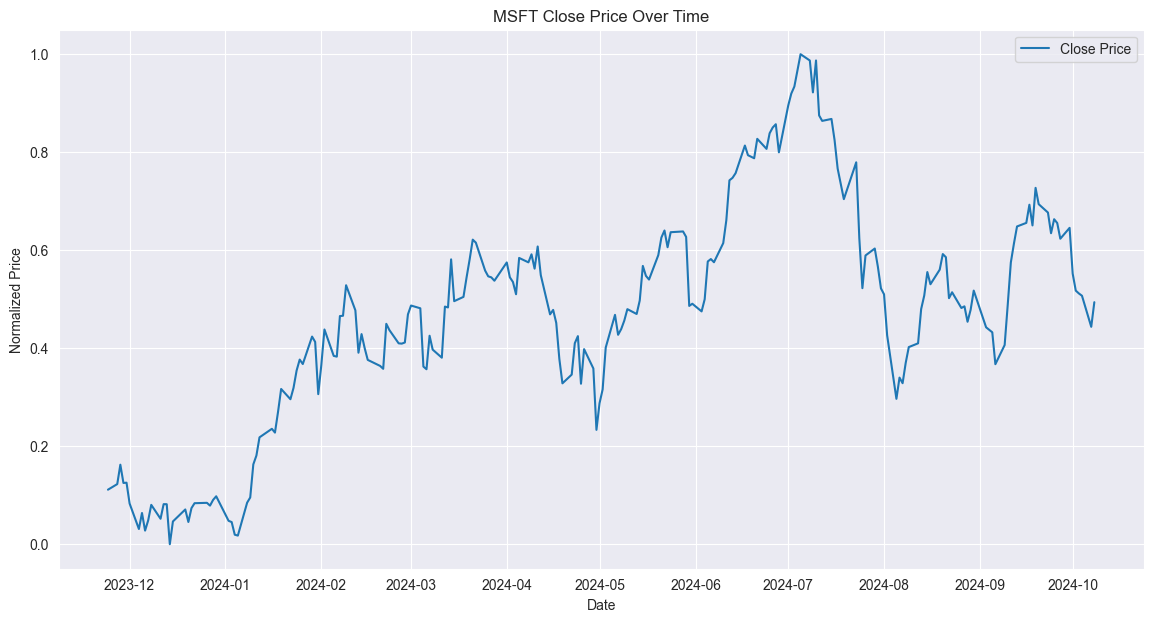

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(data["Close"], label="Close Price")
plt.title("MSFT Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

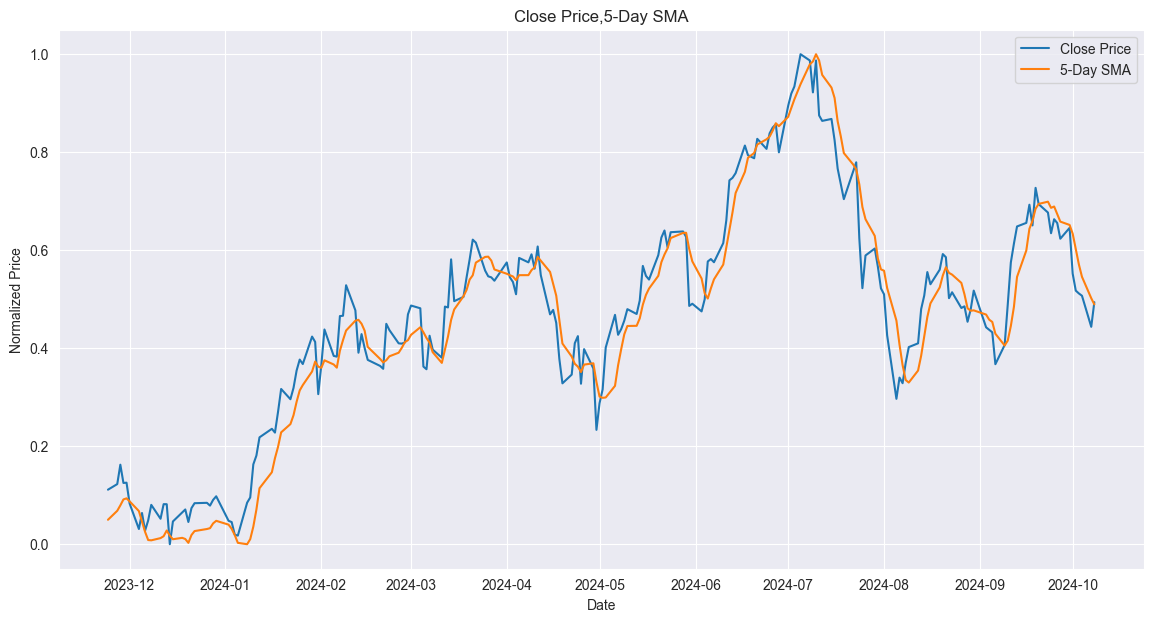

In [7]:
# Plot SMA
plt.figure(figsize=(14, 7))

plt.plot(data["Close"], label="Close Price")
plt.plot(data["SMA_5"], label="5-Day SMA")

plt.title("Close Price,5-Day SMA")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

The variables High, Low, Open and Close represent the stock price of a company on a given day. The RSI (Relative Strength Index) is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally and according to Wilder, RSI is considered overbought when above 70 and oversold when below 30. The RSI is a good indicator of the strength of the price movement. The SMA (Simple Moving Average) is an arithmetic moving average calculated by adding the closing price of the security for a number of time periods and then dividing this total by the number of time periods. The SMA is a good indicator of the trend of the price movement.

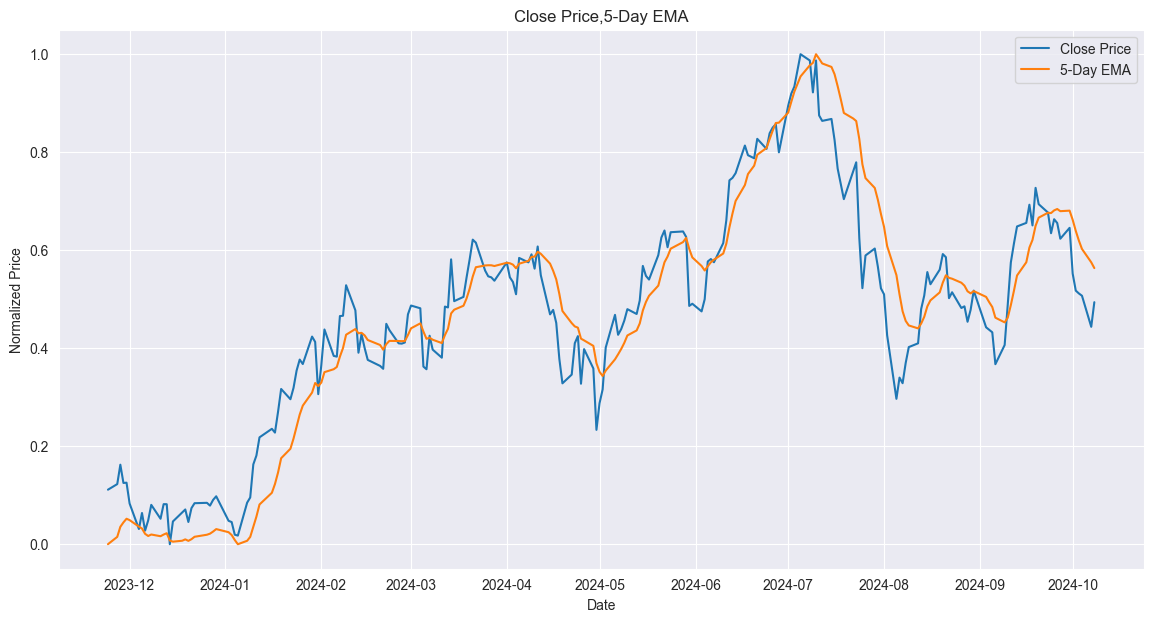

In [8]:
# Plot EMA
plt.figure(figsize=(14, 7))

plt.plot(data["Close"], label="Close Price")
plt.plot(data["EMA"], label="5-Day EMA")

plt.title("Close Price,5-Day EMA")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

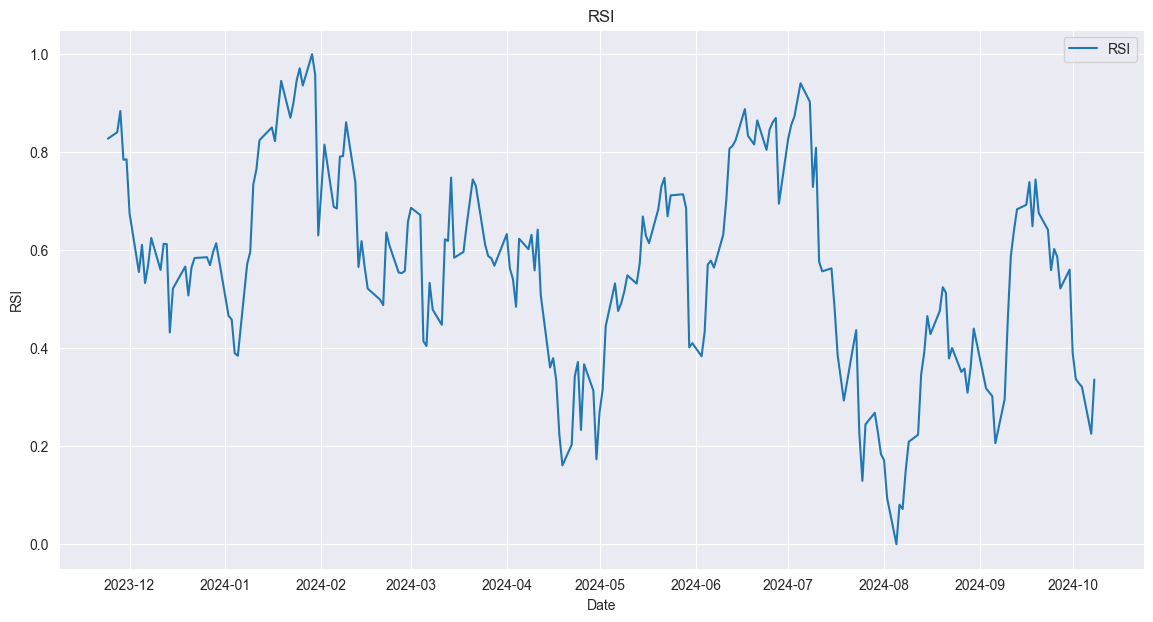

In [14]:
# Plot RSI
plt.figure(figsize=(14, 7))

plt.plot(data["RSI"], label="RSI")

plt.title("RSI")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

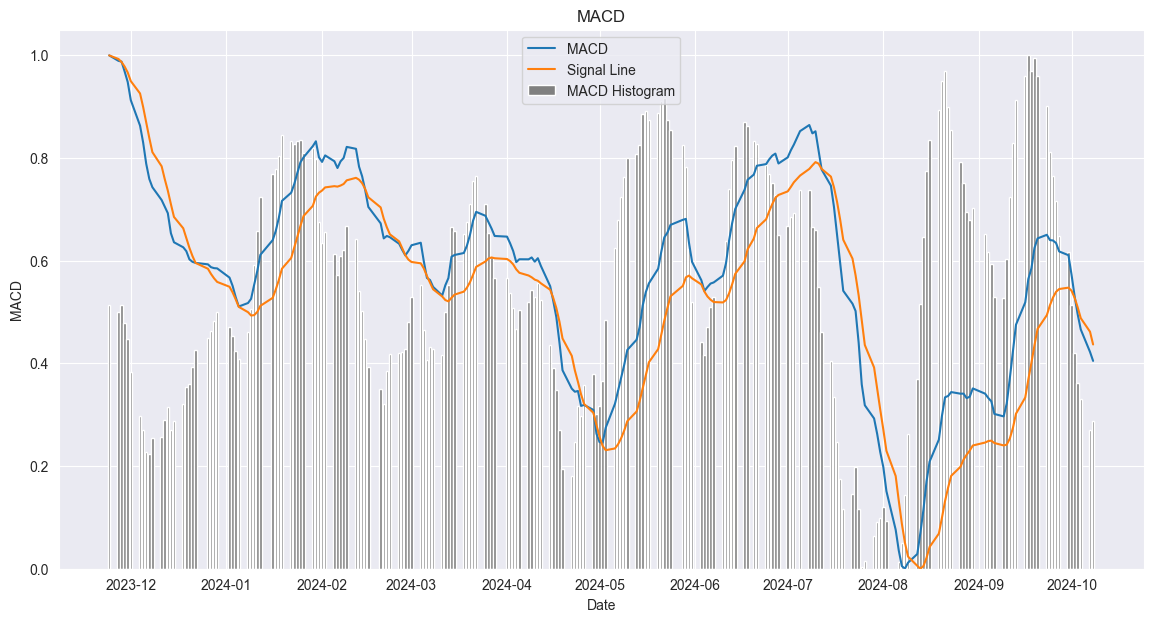

In [15]:
# Plot MACD
plt.figure(figsize=(14, 7))

plt.plot(data["MACD"], label="MACD")
plt.plot(data["MACD_Signal"], label="Signal Line")

plt.bar(data.index, data["MACD_Histogram"], label="MACD Histogram", color="gray")
plt.title("MACD")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.show()


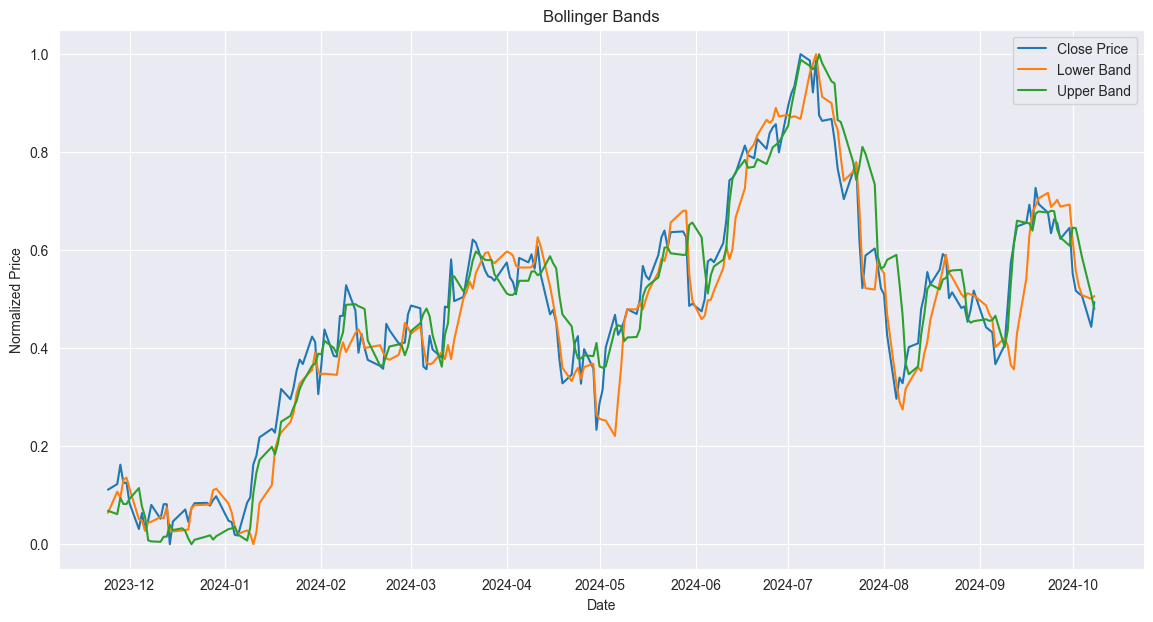

In [18]:
# Bollinger Bands
plt.figure(figsize=(14, 7))


# BollingerB_Lower     0
# BollingerB_Middle    0
# BollingerB_Upper     0
plt.plot(data["Close"], label="Close Price")
plt.plot(data["BollingerB_Lower"], label="Lower Band")
# plt.plot(data["BollingerB_Middle"], label="Middle Band")
plt.plot(data["BollingerB_Upper"], label="Upper Band")

plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

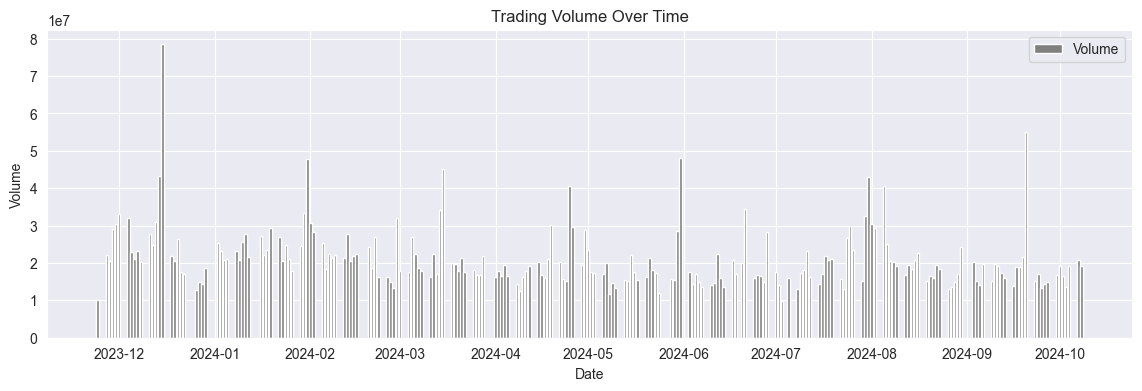

In [9]:
plt.figure(figsize=(14, 4))
plt.bar(data.index, data["Volume"], label="Volume", color="gray")
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

Volume is the number of shares traded on a given day.

In [10]:
data["Returns"] = data["Close"].pct_change()

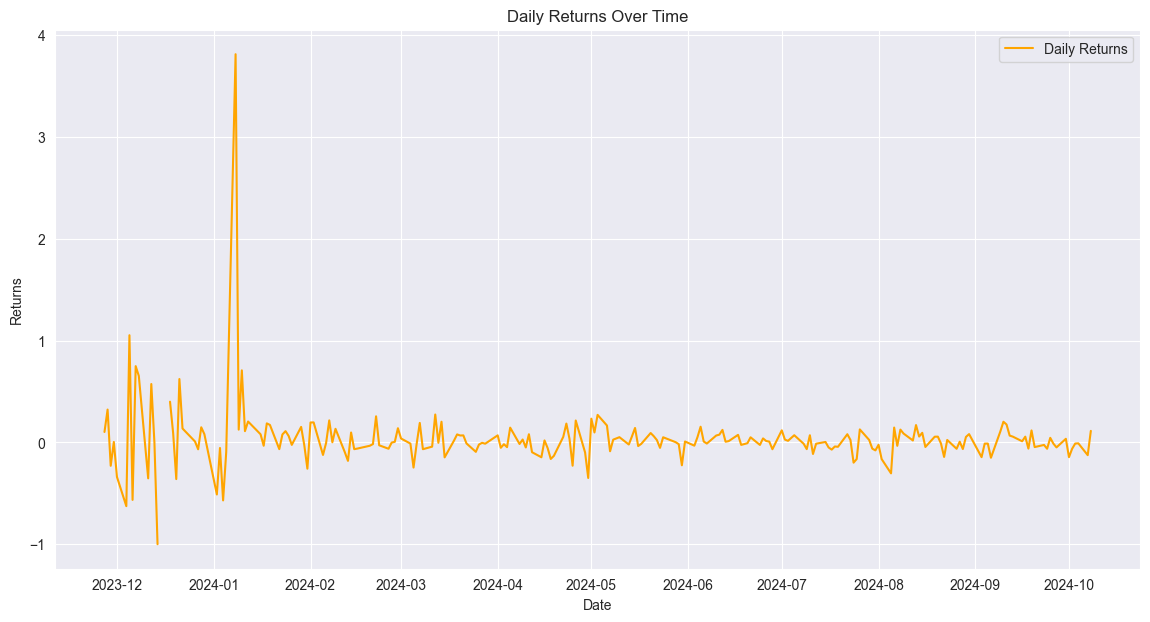

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data["Returns"], label="Daily Returns", color="orange")
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

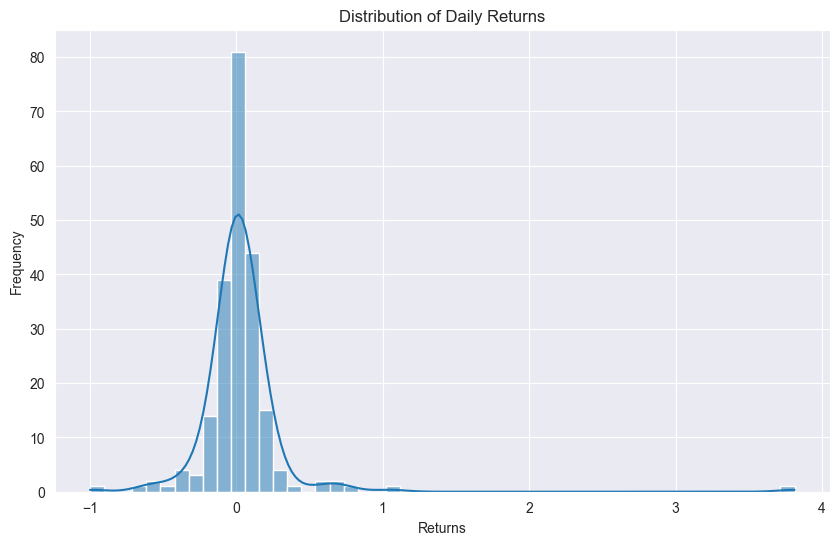

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Returns"].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

The frequency of daily returns is calculated by the formula:

$$
\text{daily return} = \frac{\text{Close} - \text{Open}}{\text{Open}}
$$

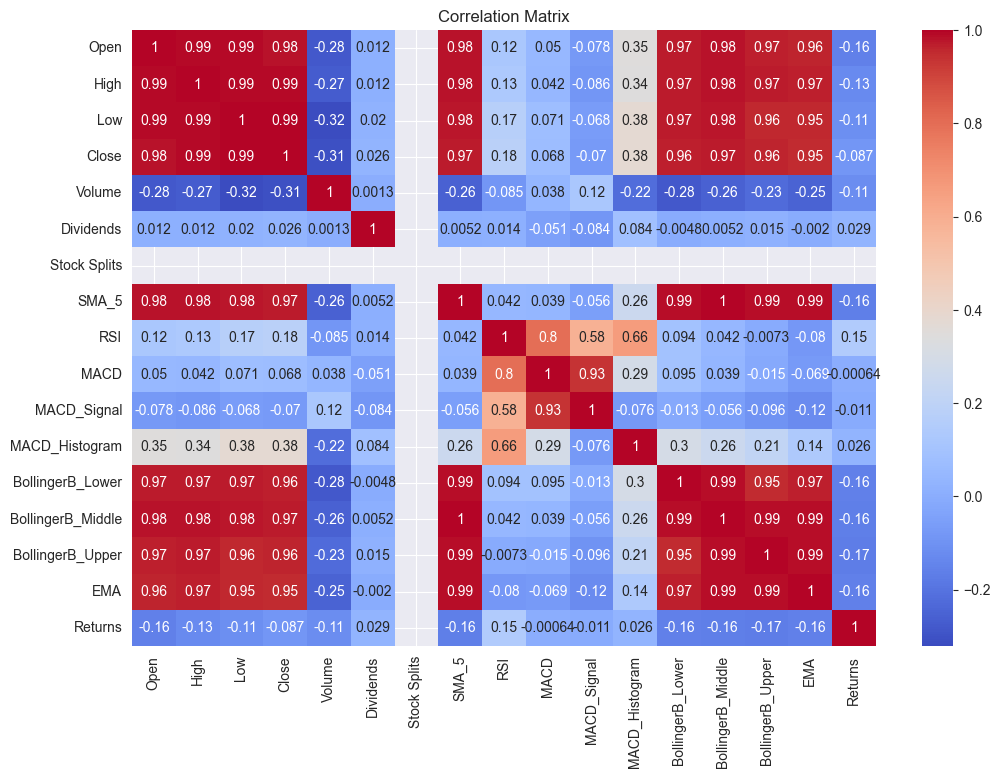

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.